# Week 13 - Information Theory Assignment


**Exercise 1: Basic Concepts (20)** 

a) If a coin is biased such that it comes up heads with a probability of 0.3, what is the entropy of the outcome of a coin toss? 
You need to write the formula to show how do you calculate the entropy.  

b) If a coin is biased and the probability of getting a head is $p$ and the probability of getting a tail is $1-p$, 
what is  the entropy of the coin, $H(p)$, in terms of $p$.

c) Plot $H(p)$ for $0\leq p \leq 1$

d) At what value of $p$ is the entropy maximized? You need to show how do you get the $p$ (you cannot just show it by obersrvation or guessing). 
Hint: use the **Extreme Value Theorem**. The theroem says that extreme values occur at criticial points. 


In [1]:
# Answers to exercise 1a.
import math

p_H = 0.3
p_T = 1 - p_H

entropy = - (p_H * math.log2(p_H) + p_T * math.log2(p_T))
print("Entropy:", entropy)


Entropy: 0.8812908992306927


In [2]:
#Answer to 1b.

import numpy as np

# Define the entropy function
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

# Example usage
p = 0.3  # You can change this value to test with different probabilities
entropy_value = entropy(p)
print("Entropy H(p) for p =", p, "is:", entropy_value)


Entropy H(p) for p = 0.3 is: 0.8812908992306927


C:\Users\south\AppData\Local\Temp\ipykernel_12268\2760084058.py:7: RuntimeWarning: divide by zero encountered in log2
  return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))
C:\Users\south\AppData\Local\Temp\ipykernel_12268\2760084058.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))


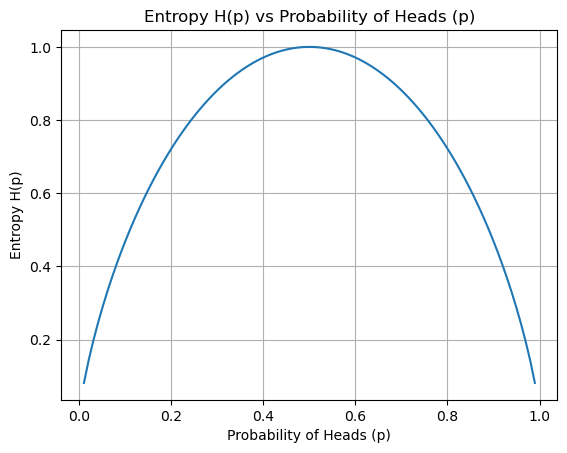

In [3]:
#Answer to 1c.
import numpy as np
import matplotlib.pyplot as plt

# Define the entropy function
def entropy(p):
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

# Generate p values
p_values = np.linspace(0, 1, 100)
# Calculate entropy for each p
entropy_values = [entropy(p) for p in p_values]

# Plot
plt.plot(p_values, entropy_values)
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy H(p)')
plt.title('Entropy H(p) vs Probability of Heads (p)')
plt.grid(True)
plt.show()

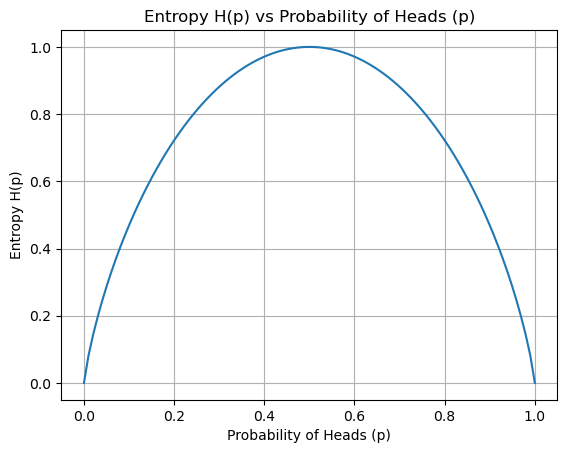

Maximum entropy occurs at p = 0.494949494949495
Maximum entropy value is 0.999926399368686


In [4]:
#Answer to 1d.
import numpy as np
import matplotlib.pyplot as plt

# Define the entropy function
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

# Generate p values
p_values = np.linspace(0, 1, 100)
# Calculate entropy for each p
entropy_values = [entropy(p) for p in p_values]

# Plot
plt.plot(p_values, entropy_values)
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Entropy H(p)')
plt.title('Entropy H(p) vs Probability of Heads (p)')
plt.grid(True)
plt.show()

# Display the maximum entropy
max_entropy = max(entropy_values)
print("Maximum entropy occurs at p =", p_values[entropy_values.index(max_entropy)])
print("Maximum entropy value is", max_entropy)

**Exercise 2: Mutual Information (15)** 

Consider two random variables X and Y with joint distribution given by:

|      | Y=0 | Y=1 | 
|------|-----|-----|
| X=0  | 1/4 | 1/4 |  
| X=1  | 1/4 | 1/4 |  

a) Compute the marginal distributions $ P(X) $ and $ P(Y) $.

b) Compute the mutual information $ I(X; Y) $ between $X$ and $Y$ using the definition:
$$ I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x,y) \log \left( \frac{p(x,y)}{p(x)p(y)} \right) $$

c) Does knowing the value of one of these variables give any information about the other?

In [5]:
#2a. Compute the marginal distributions 𝑃(𝑋) and 𝑃(𝑌)

import numpy as np

# Joint distribution
joint_prob = np.array([[1/4, 1/4], [1/4, 1/4]])

# Marginal distributions
P_X = joint_prob.sum(axis=1)
P_Y = joint_prob.sum(axis=0)

print("Marginal distribution P(X):", P_X)
print("Marginal distribution P(Y):", P_Y)



Marginal distribution P(X): [0.5 0.5]
Marginal distribution P(Y): [0.5 0.5]


In [8]:
#2b. Compute the mutual information 𝐼(𝑋;𝑌) between 𝑋 and 𝑌 using the definition described.

import numpy as np

# Joint distribution
joint_prob = np.array([[1/4, 1/4], [1/4, 1/4]])

# Marginal distributions
P_X = joint_prob.sum(axis=1)
P_Y = joint_prob.sum(axis=0)

# Calculate mutual information
mutual_info = 0
for i in range(2):
    for j in range(2):
        p_xy = joint_prob[i, j]
        p_x = P_X[i]
        p_y = P_Y[j]
        if p_xy > 0:  # To avoid log(0) issue
            mutual_info += p_xy * np.log2(p_xy / (p_x * p_y))

print("Mutual Information I(X;Y):", mutual_info)


Mutual Information I(X;Y): 0.0


#2c. Does knowing the value of one of these variables give any information about the other?
Since the mutual info I(X;Y) is 0.0, knowing the value of one variable 𝑋
will not give any info about variable Y. X and Y are independent variables.


**Exercise 3:  Conditional Entropy (25)**

Conditional Entropy
Given the joint distribution of two discrete random variables $ X $ and $ Y $ as:

|      | Y=0 | Y=1 | Y=2 |
|------|-----|-----|-----|
| X=0  | 1/6 | 1/6 |  0  |
| X=1  | 1/6 |  0  | 1/3 |
| x=2  | 0  | 1/12 | 1/12|

a) Compute the marginal distribution of $ X $.

b) Computer the marginal distributions $P(X)$ and $P(Y)$.

c) Compute the conditional entropy $ H(X|Y=0) $.

d) Compute the overall conditional entropy $ H(X|Y)$.

e) Computer the mutual information $I(X;Y)$ between $X$ and $Y$. 

Please write Python code to complete the above problems.

In [9]:
# Solutions for a. and b.
import numpy as np

# Joint distribution
joint_prob = np.array([
    [1/6, 1/6, 0],
    [1/6, 0, 1/3],
    [0, 1/12, 1/12]
])

# Marginal distributions
P_X = joint_prob.sum(axis=1)  # Sum over columns to get P(X)
P_Y = joint_prob.sum(axis=0)  # Sum over rows to get P(Y)

print("Marginal distribution P(X):", P_X)
print("Marginal distribution P(Y):", P_Y)


Marginal distribution P(X): [0.33333333 0.5        0.16666667]
Marginal distribution P(Y): [0.33333333 0.25       0.41666667]


In [10]:
#c. Compute the conditional entropy 𝐻(𝑋|𝑌=0).

def conditional_entropy_given_y(joint_prob, P_Y, y_value):
    p_x_given_y = joint_prob[:, y_value] / P_Y[y_value]
    return -np.sum(p_x_given_y * np.log2(p_x_given_y, where=p_x_given_y>0))

# Compute H(X|Y=0)
H_X_given_Y0 = conditional_entropy_given_y(joint_prob, P_Y, 0)
print("Conditional Entropy H(X|Y=0):", H_X_given_Y0)


Conditional Entropy H(X|Y=0): 1.0


In [11]:
#d. Compute the overall conditional entropy 𝐻(𝑋|𝑌).

H_X_given_Y = np.sum([P_Y[y] * conditional_entropy_given_y(joint_prob, P_Y, y) for y in range(len(P_Y))])
print("Overall Conditional Entropy H(X|Y):", H_X_given_Y)


Overall Conditional Entropy H(X|Y): 0.8637106647166901


In [ ]:
#e. Computer the mutual information 𝐼(𝑋;𝑌) between 𝑋 and 𝑌.

def entropy(prob_dist):
    return -np.sum(prob_dist * np.log2(prob_dist, where=prob_dist>0))

# Compute H(X)
H_X = entropy(P_X)

# Compute mutual information I(X;Y)
I_X_Y = H_X - H_X_given_Y
print("Mutual Information I(X;Y):", I_X_Y)


### The 9 Balls Problem (40)
The following is my favorite 'brain teaser' ever; I think about it frequently as it teaches us how to learn about the world as quickly as possible.  I stongly urge you to struggle with it - its a classic, to be savoured.

**Problem**
You have 9 balls, and one of them is slightly heavier than the others. The difference is not visible to the eye, but it can be measured using a balance scale (one of [these](https://www.vectorstock.com/royalty-free-vector/balance-scale-vector-22683984)). Determine which ball is the heaviest using the balance scale the **fewest times** possible.  Hint: its less than 3

**Approach** Use principles of information theory, specifically entropy and information gain, to determine the heaviest ball among 9 balls using a balance scale. Recall from the lecture that we want to set up experiments to maximise what we learn, that is to set up sampling from the most uniform distribution possible.


a) Define entropy in the context of information theory. What does it measure?

# Answer: According to the information theory, entropy is a measure of the amount of uncertainty or randomness in a distribution of outcomes or random variable. Entropy quantifies uncertainty.

b) Calculate the initial entropy when any of the 9 balls could be the heaviest with equal likelihood.

Hint: Use the formula for entropy:   $ H = - \sum p_i \log_2 p_i $

In [15]:
# Answer
import math

# Number of balls
n = 9

# Probability of each ball being the heaviest
p = 1 / n

# Entropy calculation
entropy = -n * (p * math.log2(p))
print("Initial entropy when any of the 9 balls could be the heaviest with equal likelihood:", entropy)

Initial entropy when any of the 9 balls could be the heaviest with equal likelihood: 3.169925001442312


c) You have 4 possible ways to make your first weighting: one ball on each side, two balls on each side, three balls on each side, or four balls on each side. 

- What is the minimal information gain (IG) if you choose one ball on each side? You need to consider all three possible outcomes: balance, left side heavier,
 or right side heavier. They may give you different IG. You should use the worst IG rather than the best IG. 
- What is the minimal information gain (IG) if you choose two balls on each side?
- What is the minimal information gain (IG) if you choose three balls on each side?
- What is the minimal information gain (IG) if you choose four balls on each side?

In [7]:
#Answer

import math

def entropy(n):
    """Calculate the entropy given n items."""
    return math.log2(n)

def information_gain(initial_entropy, remaining_entropy):
    """Calculate the information gain."""
    return initial_entropy - remaining_entropy

# Initial entropy
initial_entropy = entropy(9)

# Scenarios
scenarios = {
    'one_ball_on_each_side': [entropy(7), entropy(2)],
    'two_balls_on_each_side': [entropy(5), entropy(4)],
    'three_balls_on_each_side': [entropy(3), entropy(6)],
    'four_balls_on_each_side': [entropy(1), entropy(8)],
}

# Calculate the minimal information gain for each scenario
results = {}
for scenario, entropies in scenarios.items():
    worst_case_entropy = max(entropies)
    ig = information_gain(initial_entropy, worst_case_entropy)
    results[scenario] = ig

# Print the results
for scenario, ig in results.items():
    print(f"Minimal Information Gain for {scenario}: {ig:.2f} bits")

# Determine the best scenario
best_scenario = min(results, key=results.get)
print(f"\nThe best scenario is {best_scenario} with the highest minimal information gain of {results[best_scenario]:.2f} bits")


Minimal Information Gain for one_ball_on_each_side: 0.36 bits
Minimal Information Gain for two_balls_on_each_side: 0.85 bits
Minimal Information Gain for three_balls_on_each_side: 0.58 bits
Minimal Information Gain for four_balls_on_each_side: 0.17 bits

The best scenario is four_balls_on_each_side with the highest minimal information gain of 0.17 bits


d) Based on your answers for c), choose what you need to do for step 1. 


# Answer
First step should be to find the weighting that maximizes information gain. We know the results show that placing two
balls on each side provides the highest minimal information gain.

We would dive the nine balls into groups of two then choose two balls on each side to do the first Weighing then repeat these steps
to determine the heaviest ball.

e) Based on the outcome of the first weighing, describe the possible strategies for the second weighing to determine the heaviest ball. 


# Answer
Well, if the weighing remains equals then the set of balls chosen are balanced. And then you can move on to the unweighed balls to determine if the heaviest ball is in one of those sets. Then whichever side is heavier, this is the side with the heaviest ball so you would then weigh the individual balls in the heaviest set against each other to determine which ball is heaviest. And if the first weigh in was for one ball or multiple on each side, you could do the same strategy.

f) Calculate the IG for your second weighting.

In [13]:
# Answer
# Scenarios for first weighing
first_scenarios = {
    'one_ball_on_each_side': [entropy(7), entropy(2)],
    'two_balls_on_each_side': [entropy(5), entropy(4)],
    'three_balls_on_each_side': [entropy(3), entropy(6)],
    'four_balls_on_each_side': [entropy(1), entropy(8)],
}

# Calculate minimal information gain all first weighing scenarios
first_results = {}
for scenario, entropies in first_scenarios.items():
    worst_case_entropy = max(entropies)
    ig = information_gain(initial_entropy, worst_case_entropy)
    first_results[scenario] = ig

# Determine best first weighing scenario
best_first_scenario = max(first_results, key=first_results.get)

# Scenarios for second weighing derived from first weighing outcomes
second_scenarios = {
    'balance': entropy(3),  # Balls 7, 8, 9
    'left_heavier': entropy(2),  # Balls 1, 2
    'right_heavier': entropy(2),  # Balls 3, 4
}

# Calculate information gain for all second weighing scenarios
second_results = {}
for scenario, remaining_entropy in second_scenarios.items():
    ig = information_gain(initial_entropy, remaining_entropy)
    second_results[scenario] = ig
    
# Print the results
print("Information Gain for First Weighing Scenarios:")
for scenario, ig in first_results.items():
    print(f"{scenario}: {ig:.2f} bits")

print(f"\nThe best first weighing scenario result is {best_first_scenario} with the highest minimal information gain of {first_results[best_first_scenario]:.2f} bits")

print("\nInformation Gain for Second Weighing Scenarios:")
for scenario, ig in second_results.items():
    print(f"{scenario}: {ig:.2f} bits")

print(f"\nThe information gain for the second weighing scenarios is balanced at {information_gain(initial_entropy, entropy(3)):.2f} bits")

Information Gain for First Weighing Scenarios:
one_ball_on_each_side: 0.36 bits
two_balls_on_each_side: 0.85 bits
three_balls_on_each_side: 0.58 bits
four_balls_on_each_side: 0.17 bits

The best first weighing scenario result is two_balls_on_each_side with the highest minimal information gain of 0.85 bits

Information Gain for Second Weighing Scenarios:
balance: 1.58 bits
left_heavier: 2.17 bits
right_heavier: 2.17 bits

The information gain for the second weighing scenarios is balanced at 1.58 bits
